## IMPORTING THE UNCLEAN DATASET

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data_path  = "/workspaces/AML-Project-team-L/unclean.csv"          # uploaded file
target_col = "Property Value"                    # change if needed
save_path  = "/workspaces/AML-Project-team-L/cleaned.csv"  # cleaned output

# ------------------------------------------------------------------
# 1) LOAD DATA
# ------------------------------------------------------------------
df = pd.read_csv("unclean.csv" )

C:\Users\Swetha\AppData\Local\Temp\ipykernel_6760\1008475365.py:12: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("unclean.csv" )


Dropping rows with missing target variable

In [2]:
# 2) DROP ROWS WITH MISSING TARGET
# ------------------------------------------------------------------
df = df.dropna(subset=['Property Value']).copy()


## Removing unwanted columns

In [3]:
# Step 1: Remove unwanted columns
columns_to_drop = [
    "Property Link",
    "Address line 1",
    "Address line 2",
    "Full Address_x",
    "Full Address_y",
    "\nbed",
    "appreciate/depreciate",
    
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

Showing missing values and summary

In [4]:
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())

print("\n--- Numeric Summary ---")
print(df.describe(include='number'))



--- Missing Values per Column ---
Type of House                                                                0
Property Value                                                               0
bed                                                                        405
bath                                                                       552
Area (Sqft)                                                               4464
PropertyLotSizeMetastyles__StyledPropertyLotSizeMeta-rui__sc-1cz4zco-0    9294
lot size                                                                  9294
Latitude                                                                     0
Longitude                                                                    0
Number_of_Parks_Nearby                                                       0
Distance_to_Nearest_Parks_miles                                              0
Number_of_Malls_Nearby                                                       0
Distance_to_Neare

C:\Users\Swetha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Swetha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Swetha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Swetha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encount

Remove $ from target, handle non-numeric values like "Contact for price" and convert to numerical

In [5]:
# Clean the 'Property Value' column
# Remove $ and , and handle non-numeric values like "Contact for price"
df["Property Value"] = (
    df["Property Value"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

# Remove rows where 'Property Value' is non-numeric (e.g., "Contact for price")
df = df[df["Property Value"].str.replace(".", "", regex=False).str.isnumeric()]

df["Property Value"] = df["Property Value"].astype(float)

print(df["Property Value"].head())


0    150000000.0
1       649000.0
2      6999999.0
3     18000000.0
4       274000.0
Name: Property Value, dtype: float64


In [6]:
df.head()

,Type of House,Property Value,bed,bath,Area (Sqft),PropertyLotSizeMetastyles__StyledPropertyLotSizeMeta-rui__sc-1cz4zco-0,lot size,Latitude,Longitude,Number_of_Parks_Nearby,...,Distance_to_Nearest_Trains_miles,Number_of_Airports_Nearby,Distance_to_Nearest_Airports_miles,Number_of_Museums_Nearby,Distance_to_Nearest_Museums_miles,Number_of_Libraries_Nearby,Distance_to_Nearest_Libraries_miles,Number_of_Grocery_stores_Nearby,Distance_to_Nearest_Grocery_stores_miles,borough
0,Condo for sale,150000000.0,8,10,"11,535",NaN,NaN,40.766474,-73.981266,16,...,0.130121,1,2.205337,34,0.466477,26,0.228443,194,0.151832,Manhattan
1,Condo for sale,649000.0,3,2.5,"2,431",NaN,NaN,40.826130,-73.943006,37,...,0.157511,0,inf,14,0.313484,9,0.372547,101,0.235285,Manhattan
2,Townhouse for sale,6999999.0,6,6.5+,"7,200",NaN,NaN,40.787587,-73.969240,19,...,0.153621,0,inf,17,0.458300,22,0.580740,154,0.129664,Manhattan
3,House for sale,18000000.0,8,16.5,"33,000",acre lot,1.58,40.595008,-74.106434,1,...,0.804044,0,inf,4,2.116247,1,1.616244,22,1.005562,Staten Island
4,House for sale,274000.0,3,1,"1,556",sqft lot,"2,400",40.675746,-73.822413,14,...,0.726807,0,inf,0,inf,1,1.638993,52,0.216965,Queens


## Conversions (lot size)


In [7]:
# 1. Rename the lot type column
df.rename(
    columns={"PropertyLotSizeMetastyles__StyledPropertyLotSizeMeta-rui__sc-1cz4zco-0": "lot type"},
    inplace=True
)

# 2. Clean and convert lot size & area to numeric
df["lot size"] = pd.to_numeric(df["lot size"].astype(str).str.replace(",", ""), errors="coerce")
df["Area (Sqft)"] = pd.to_numeric(df["Area (Sqft)"].astype(str).str.replace(",", ""), errors="coerce")

# 3. Compute total lot size based on logic
def compute_total_lot_size(row):
    lot_type = str(row["lot type"]).lower() if pd.notna(row["lot type"]) else ""
    lot_size = row["lot size"]
    area_sqft = row["Area (Sqft)"]

    if "acre lot" in lot_type and pd.notna(lot_size):
        return lot_size * 43560
    elif "sqft lot" in lot_type and pd.notna(lot_size):
        return lot_size
    else:
        return area_sqft  

df["total lot size(sqft)"] = df.apply(compute_total_lot_size, axis=1)

df["total lot size(sqft)"] = pd.to_numeric(df["total lot size(sqft)"], errors="coerce")


In [8]:
df.head()

,Type of House,Property Value,bed,bath,Area (Sqft),lot type,lot size,Latitude,Longitude,Number_of_Parks_Nearby,...,Number_of_Airports_Nearby,Distance_to_Nearest_Airports_miles,Number_of_Museums_Nearby,Distance_to_Nearest_Museums_miles,Number_of_Libraries_Nearby,Distance_to_Nearest_Libraries_miles,Number_of_Grocery_stores_Nearby,Distance_to_Nearest_Grocery_stores_miles,borough,total lot size(sqft)
0,Condo for sale,150000000.0,8,10,11535.0,NaN,NaN,40.766474,-73.981266,16,...,1,2.205337,34,0.466477,26,0.228443,194,0.151832,Manhattan,11535.0
1,Condo for sale,649000.0,3,2.5,2431.0,NaN,NaN,40.826130,-73.943006,37,...,0,inf,14,0.313484,9,0.372547,101,0.235285,Manhattan,2431.0
2,Townhouse for sale,6999999.0,6,6.5+,7200.0,NaN,NaN,40.787587,-73.969240,19,...,0,inf,17,0.458300,22,0.580740,154,0.129664,Manhattan,7200.0
3,House for sale,18000000.0,8,16.5,33000.0,acre lot,1.58,40.595008,-74.106434,1,...,0,inf,4,2.116247,1,1.616244,22,1.005562,Staten Island,68824.8
4,House for sale,274000.0,3,1,1556.0,sqft lot,2400.00,40.675746,-73.822413,14,...,0,inf,0,inf,1,1.638993,52,0.216965,Queens,2400.0


In [9]:
df.drop(columns=["lot size", "lot type"], inplace=True)

In [10]:
df.head()

,Type of House,Property Value,bed,bath,Area (Sqft),Latitude,Longitude,Number_of_Parks_Nearby,Distance_to_Nearest_Parks_miles,Number_of_Malls_Nearby,...,Number_of_Airports_Nearby,Distance_to_Nearest_Airports_miles,Number_of_Museums_Nearby,Distance_to_Nearest_Museums_miles,Number_of_Libraries_Nearby,Distance_to_Nearest_Libraries_miles,Number_of_Grocery_stores_Nearby,Distance_to_Nearest_Grocery_stores_miles,borough,total lot size(sqft)
0,Condo for sale,150000000.0,8,10,11535.0,40.766474,-73.981266,16,0.516540,3,...,1,2.205337,34,0.466477,26,0.228443,194,0.151832,Manhattan,11535.0
1,Condo for sale,649000.0,3,2.5,2431.0,40.826130,-73.943006,37,0.057431,0,...,0,inf,14,0.313484,9,0.372547,101,0.235285,Manhattan,2431.0
2,Townhouse for sale,6999999.0,6,6.5+,7200.0,40.787587,-73.969240,19,0.148955,2,...,0,inf,17,0.458300,22,0.580740,154,0.129664,Manhattan,7200.0
3,House for sale,18000000.0,8,16.5,33000.0,40.595008,-74.106434,1,1.515412,0,...,0,inf,4,2.116247,1,1.616244,22,1.005562,Staten Island,68824.8
4,House for sale,274000.0,3,1,1556.0,40.675746,-73.822413,14,0.953825,1,...,0,inf,0,inf,1,1.638993,52,0.216965,Queens,2400.0


## Handling missing values through imputation

For "Bed" and "Bath" we impute mode

In [11]:
most_common_bed = df["bed"].mode()[0]
df["bed"].fillna(most_common_bed, inplace=True)

median_bath = df["bath"].mode()[0]
df["bath"].fillna(median_bath, inplace=True)

C:\Users\Swetha\AppData\Local\Temp\ipykernel_6760\2679468469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bed"].fillna(most_common_bed, inplace=True)
C:\Users\Swetha\AppData\Local\Temp\ipykernel_6760\2679468469.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

For Area sq.ft we fill missing Area using group-wise median

In [12]:
df["Area (Sqft)"] = (
    df["Area (Sqft)"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .replace("nan", np.nan) 
    .astype(float)
)


In [13]:
df["Area (Sqft)_original"] = df["Area (Sqft)"]

df["bed"] = df["bed"].fillna(df["bed"].mode()[0])
df["bed"] = df["bed"].astype(str)  # just to be sure for grouping

def impute_area(row):
    if pd.isna(row["Area (Sqft)"]):        
        group_median = grouped_medians.get((row["bed"], row["Type of House"], row["borough"]))
        if pd.notna(group_median):
            return group_median
        
        group_median = fallback_medians.get((row["bed"], row["borough"]))
        if pd.notna(group_median):
            return group_median
        
        group_median = bed_medians.get(row["bed"])
        if pd.notna(group_median):
            return group_median
        
        return df["Area (Sqft)"].median()
    return row["Area (Sqft)"]


grouped_medians = df.groupby(["bed", "Type of House", "borough"])["Area (Sqft)"].median().to_dict()
fallback_medians = df.groupby(["bed", "borough"])["Area (Sqft)"].median().to_dict()
bed_medians = df.groupby("bed")["Area (Sqft)"].median().to_dict()

df["Area (Sqft)"] = df.apply(impute_area, axis=1)


Impute in same way for Total Lot size(sqft)

In [14]:
df["total lot size(sqft)_original"] = df["total lot size(sqft)"]

df["bed"] = df["bed"].fillna(df["bed"].mode()[0])
df["bed"] = df["bed"].astype(str)

# 3. Define imputation function
def impute_total_lot_size(row):
    if pd.isna(row["total lot size(sqft)"]):        
        group_median = grouped_medians.get((row["bed"], row["Type of House"], row["borough"]))
        if pd.notna(group_median):
            return group_median
        
        group_median = fallback_medians.get((row["bed"], row["borough"]))
        if pd.notna(group_median):
            return group_median
        
        group_median = bed_medians.get(row["bed"])
        if pd.notna(group_median):
            return group_median
        
        return df["total lot size(sqft)"].median()
    return row["total lot size(sqft)"]

grouped_medians = df.groupby(["bed", "Type of House", "borough"])["total lot size(sqft)"].median().to_dict()
fallback_medians = df.groupby(["bed", "borough"])["total lot size(sqft)"].median().to_dict()
bed_medians = df.groupby("bed")["total lot size(sqft)"].median().to_dict()

df["total lot size(sqft)"] = df.apply(impute_total_lot_size, axis=1)


In [15]:
df.drop(columns=["Area (Sqft)_original", "total lot size(sqft)_original"], inplace=True)


In [16]:
print("\n--- Missing Values per Column ---")
print(df.isnull().sum())


--- Missing Values per Column ---
Type of House                               0
Property Value                              0
bed                                         0
bath                                        0
Area (Sqft)                                 0
Latitude                                    0
Longitude                                   0
Number_of_Parks_Nearby                      0
Distance_to_Nearest_Parks_miles             0
Number_of_Malls_Nearby                      0
Distance_to_Nearest_Malls_miles             0
Number_of_Metros_Nearby                     0
Distance_to_Nearest_Metros_miles            0
Number_of_Clubs_Nearby                      0
Distance_to_Nearest_Clubs_miles             0
Number_of_Restaurants_Nearby                0
Distance_to_Nearest_Restaurants_miles       0
Number_of_Schools_Nearby                    0
Distance_to_Nearest_Schools_miles           0
Number_of_Colleges_Nearby                   0
Distance_to_Nearest_Colleges_miles          0

In [17]:
import numpy as np
import pandas as pd

distance_cols = [col for col in df.columns if "Distance_to" in col and "miles" in col]

bins = [0, 1, 2, 3, 4, 5, np.inf]
labels = ["0–1 miles", "1–2 miles", "2–3 miles", "3–4 miles", "4–5 miles", "5+ miles"]

for col in distance_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    binned_col = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    binned_col = binned_col.cat.add_categories("Unknown").fillna("Unknown")
    new_col_name = f"{col}_binned"
    df[new_col_name] = binned_col

    df.drop(columns=[col], inplace=True)


C:\Users\Swetha\AppData\Local\Temp\ipykernel_6760\3436953979.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Swetha\AppData\Local\Temp\ipykernel_6760\3436953979.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [18]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Type of House', 'bed', 'bath', 'borough', 'Distance_to_Nearest_Parks_miles_binned', 'Distance_to_Nearest_Malls_miles_binned', 'Distance_to_Nearest_Metros_miles_binned', 'Distance_to_Nearest_Clubs_miles_binned', 'Distance_to_Nearest_Restaurants_miles_binned', 'Distance_to_Nearest_Schools_miles_binned', 'Distance_to_Nearest_Colleges_miles_binned', 'Distance_to_Nearest_Universities_miles_binned', 'Distance_to_Nearest_Buses_miles_binned', 'Distance_to_Nearest_Trains_miles_binned', 'Distance_to_Nearest_Airports_miles_binned', 'Distance_to_Nearest_Museums_miles_binned', 'Distance_to_Nearest_Libraries_miles_binned', 'Distance_to_Nearest_Grocery_stores_miles_binned']


## Encoding categorical values using One-Hot encoding

In [19]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [20]:
df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df_encoded.head()

C:\Users\Swetha\AppData\Local\Temp\ipykernel_6760\1561826786.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,Property Value,Area (Sqft),Latitude,Longitude,Number_of_Parks_Nearby,Number_of_Malls_Nearby,Number_of_Metros_Nearby,Number_of_Clubs_Nearby,Number_of_Restaurants_Nearby,Number_of_Schools_Nearby,...,Distance_to_Nearest_Libraries_miles_binned_3–4 miles,Distance_to_Nearest_Libraries_miles_binned_4–5 miles,Distance_to_Nearest_Libraries_miles_binned_5+ miles,Distance_to_Nearest_Libraries_miles_binned_Unknown,Distance_to_Nearest_Grocery_stores_miles_binned_1–2 miles,Distance_to_Nearest_Grocery_stores_miles_binned_2–3 miles,Distance_to_Nearest_Grocery_stores_miles_binned_3–4 miles,Distance_to_Nearest_Grocery_stores_miles_binned_4–5 miles,Distance_to_Nearest_Grocery_stores_miles_binned_5+ miles,Distance_to_Nearest_Grocery_stores_miles_binned_Unknown
0,150000000.0,11535.0,40.766474,-73.981266,16,3,110,30,2786,165,...,0,0,0,0,0,0,0,0,0,0
1,649000.0,2431.0,40.826130,-73.943006,37,0,72,5,572,220,...,0,0,0,0,0,0,0,0,0,0
2,6999999.0,7200.0,40.787587,-73.969240,19,2,88,7,1933,192,...,0,0,0,0,0,0,0,0,0,0
3,18000000.0,33000.0,40.595008,-74.106434,1,0,7,1,173,16,...,0,0,0,0,1,0,0,0,0,0
4,274000.0,1556.0,40.675746,-73.822413,14,1,30,7,252,32,...,0,0,0,0,0,0,0,0,0,0


## Visualization

## Analyzing Numeric Feature Distributions
Generated boxplots for all numeric columns to examine their distributions. These visualizations help us identify key characteristics like median values, data spread (IQR), and potential outliers.

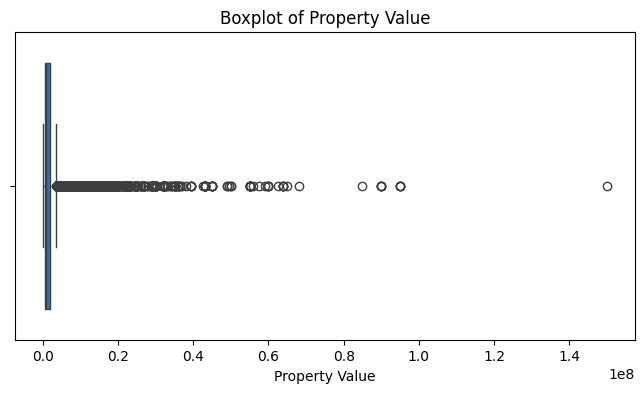

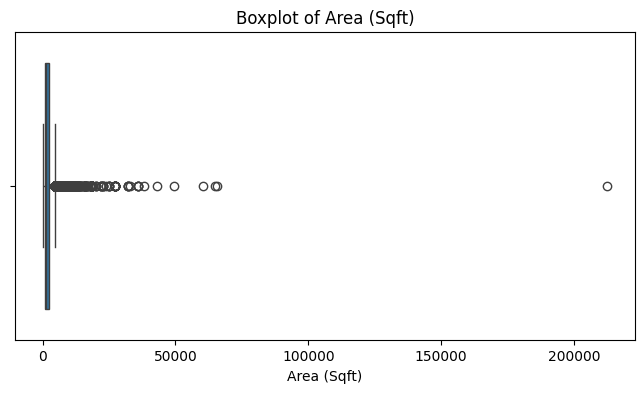

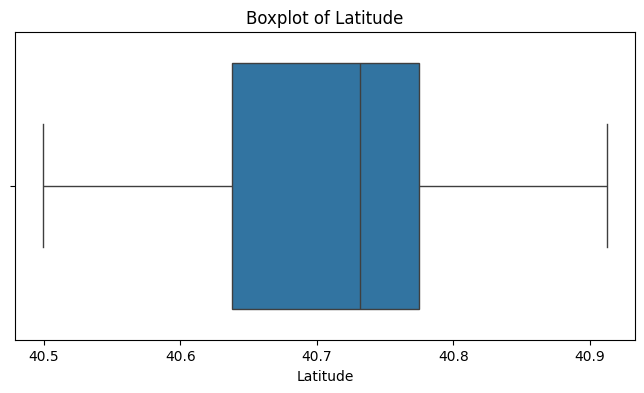

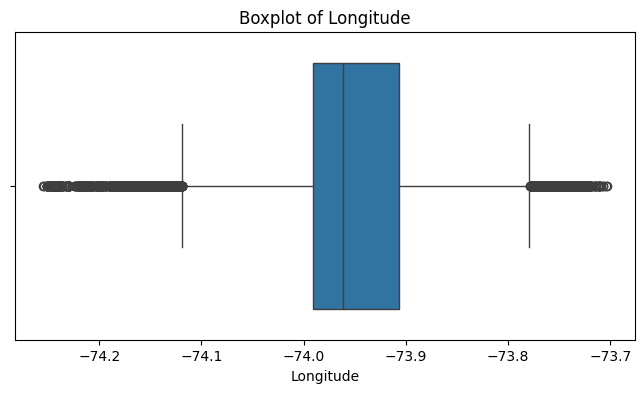

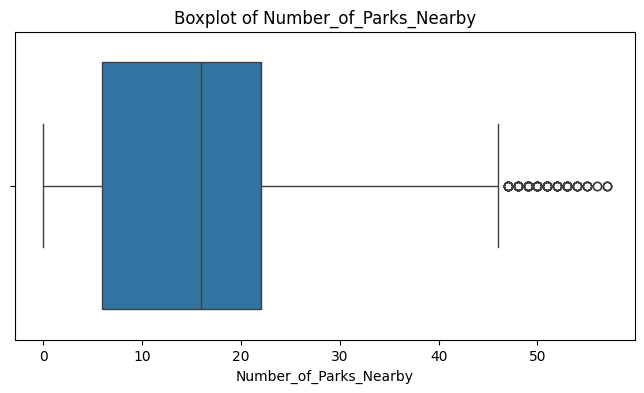

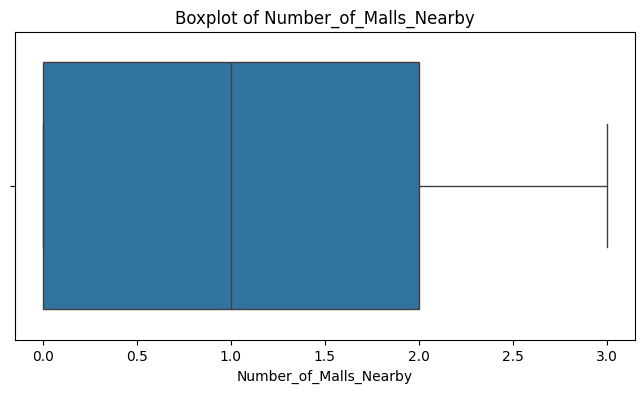

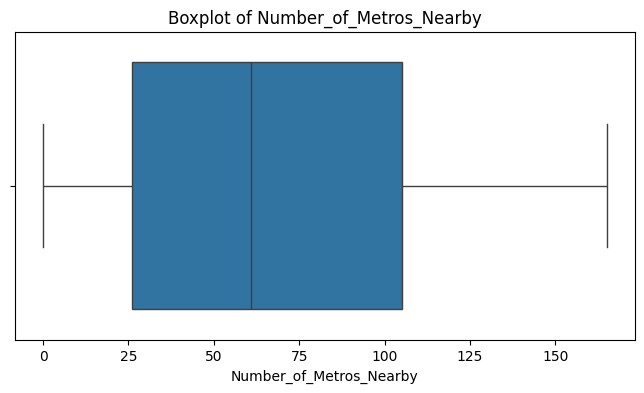

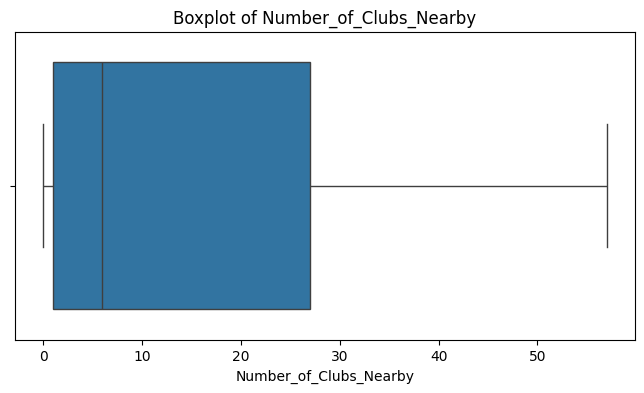

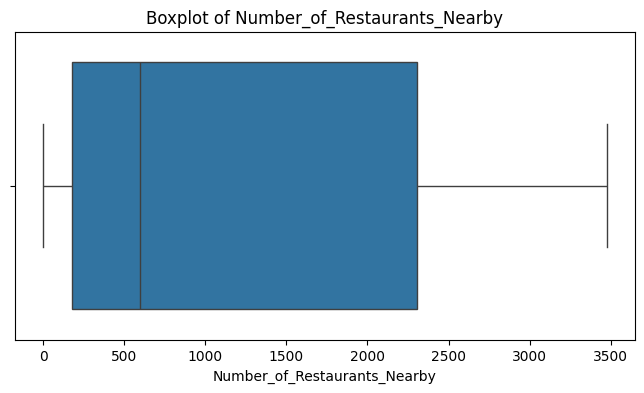

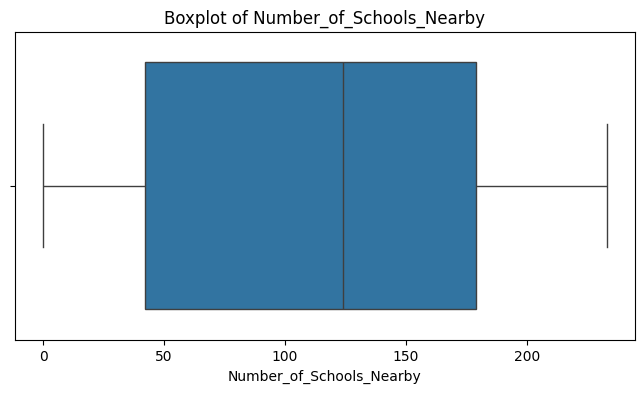

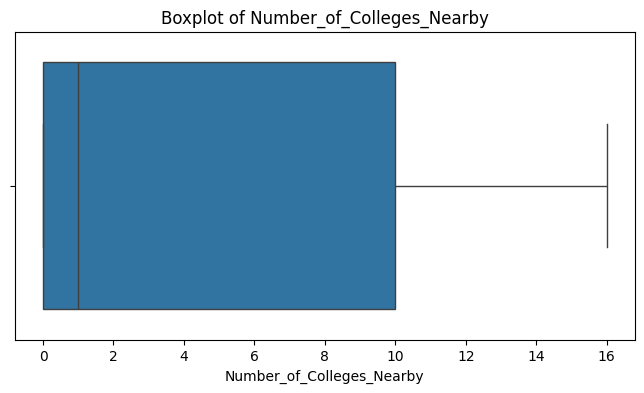

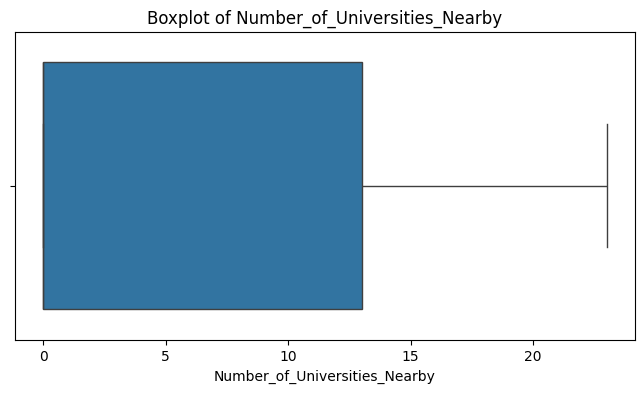

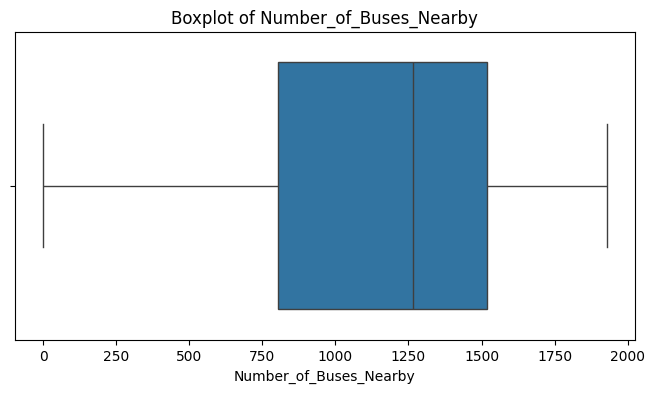

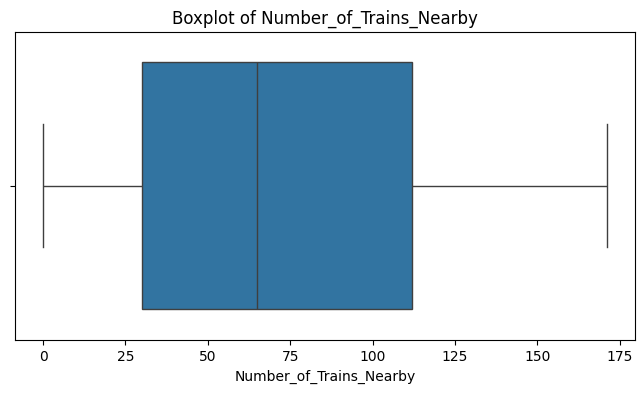

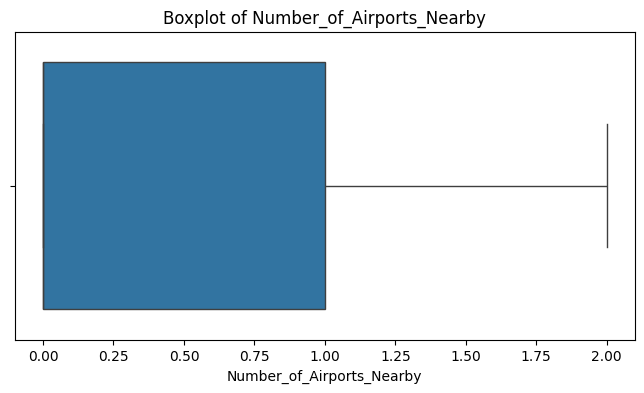

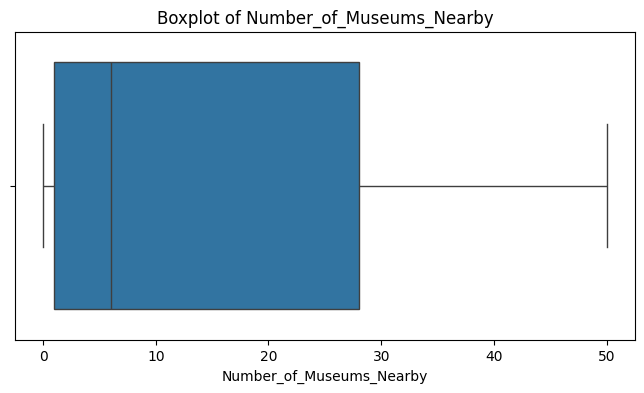

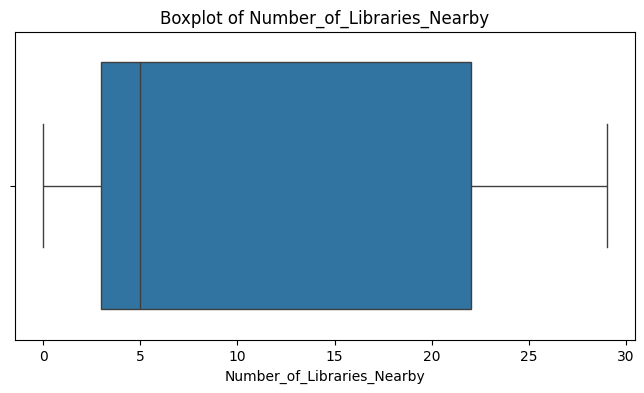

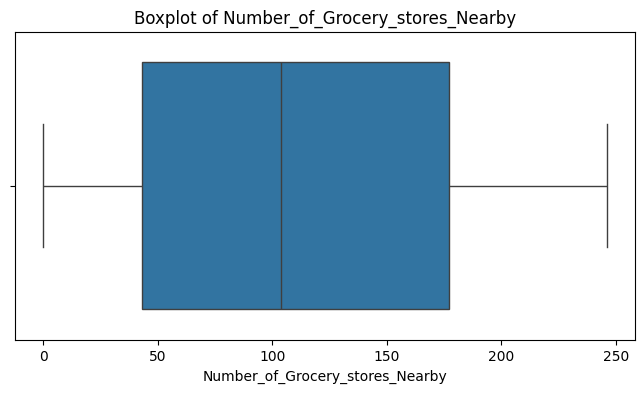

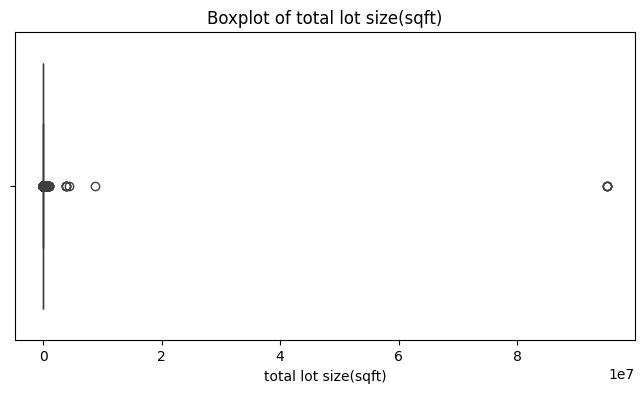

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

plt.show()

## Analyzing Feature Relationships with Property Value
To identify which features most influence property prices, we plot each numeric variable against Property Value. Scatter plots help reveal correlations, outliers, and potential non-linear trends. Strong relationships may become key predictors, while weak or noisy ones could be removal.

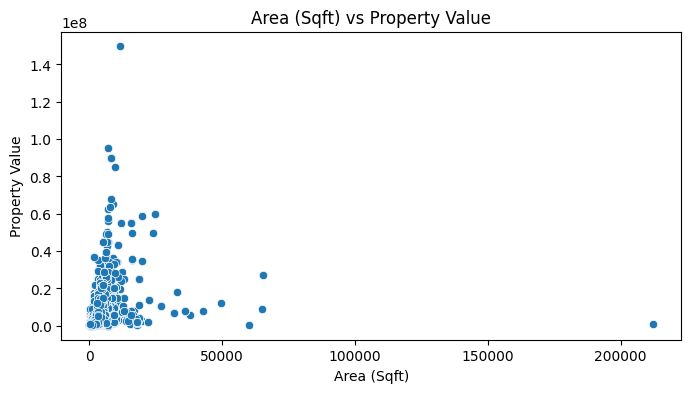

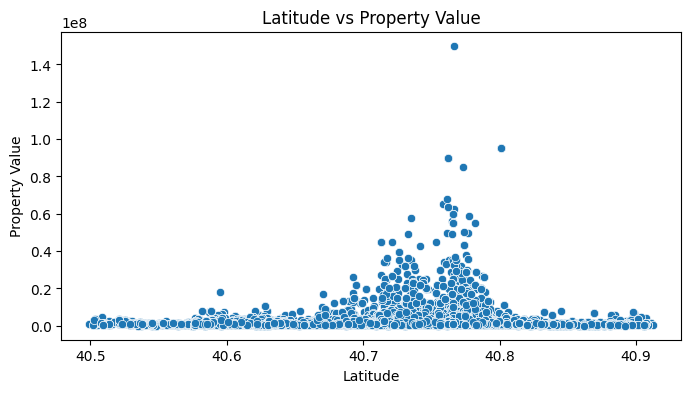

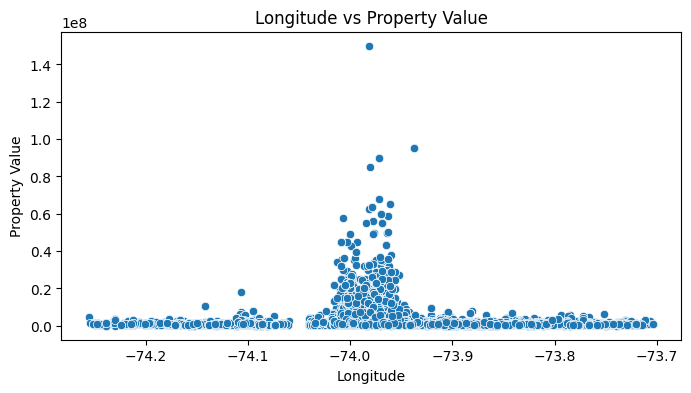

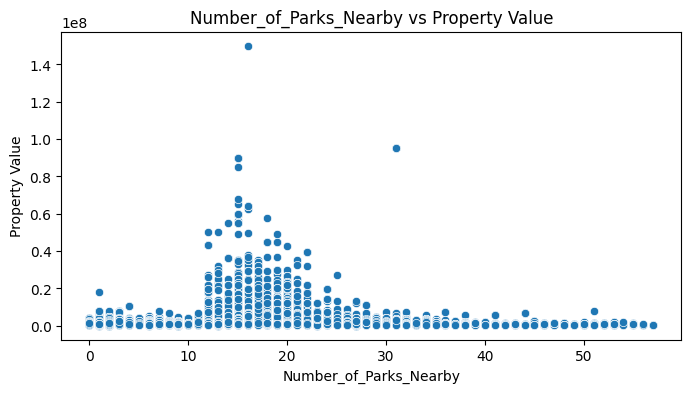

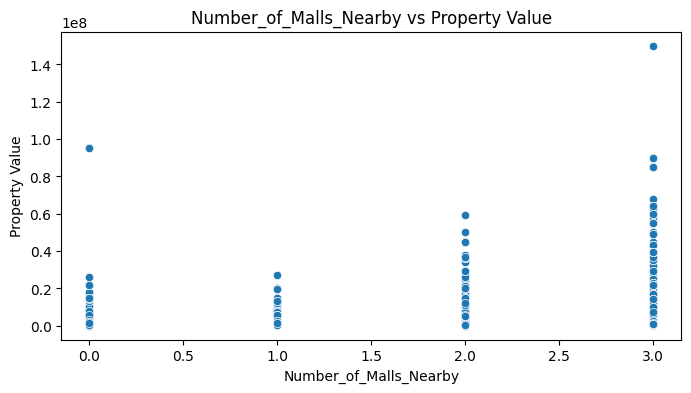

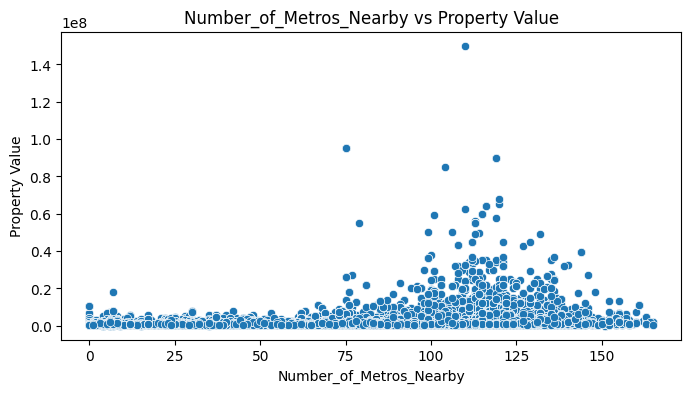

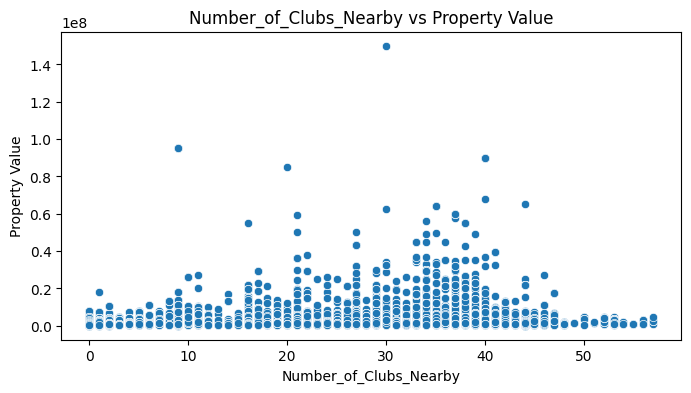

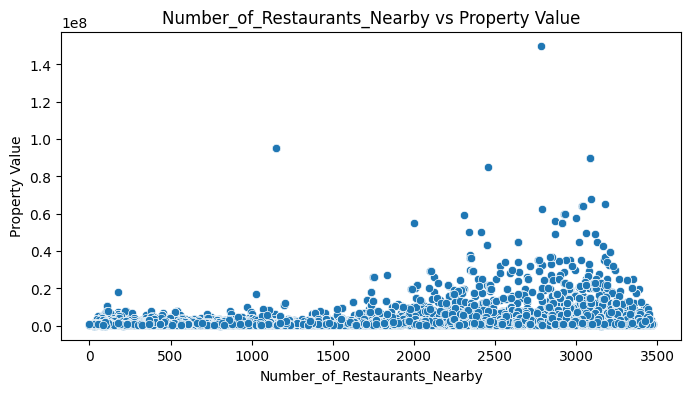

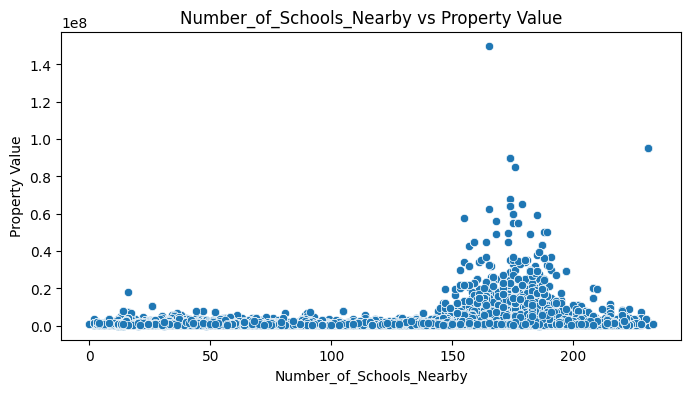

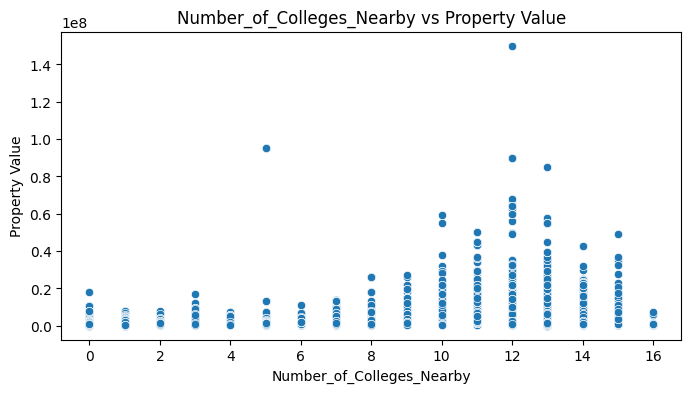

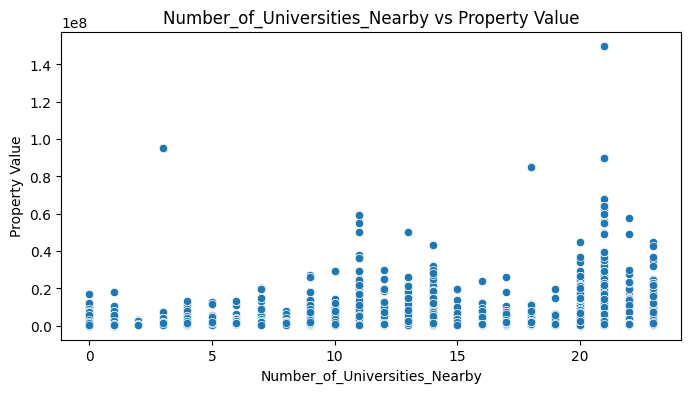

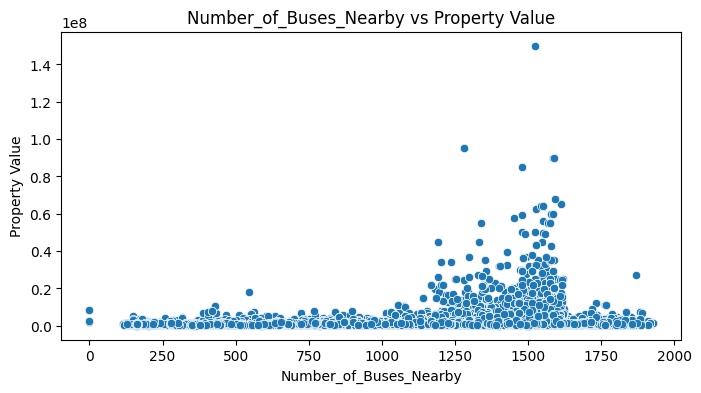

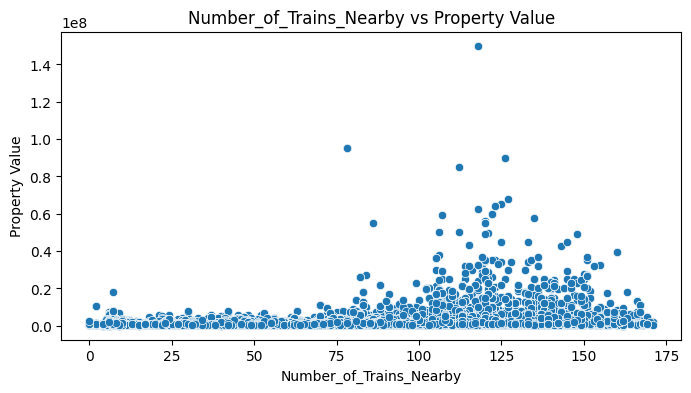

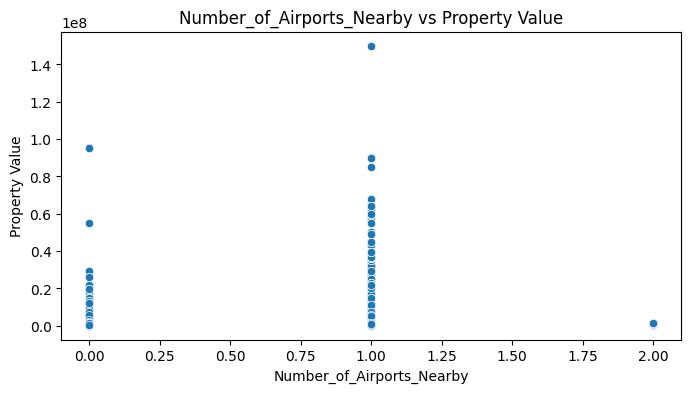

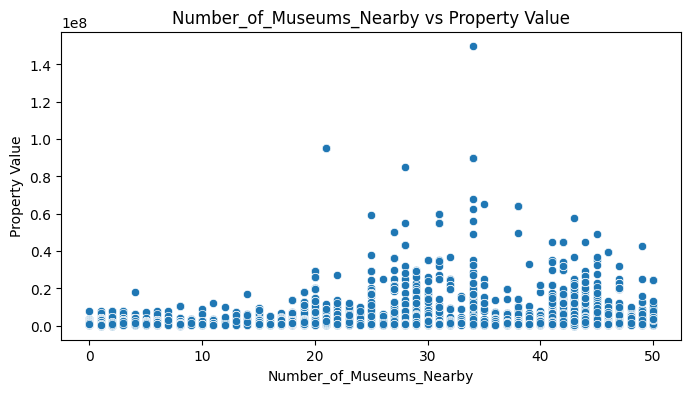

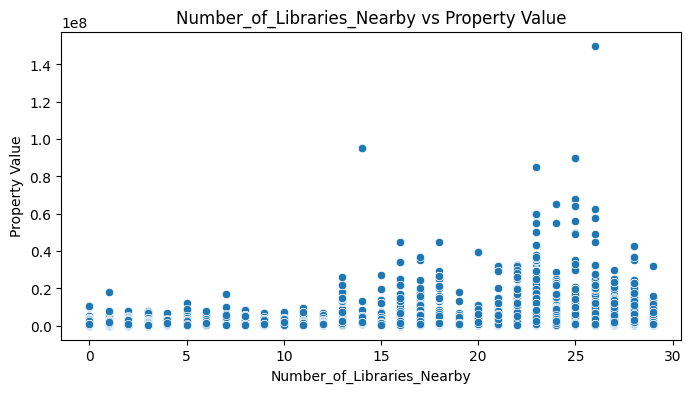

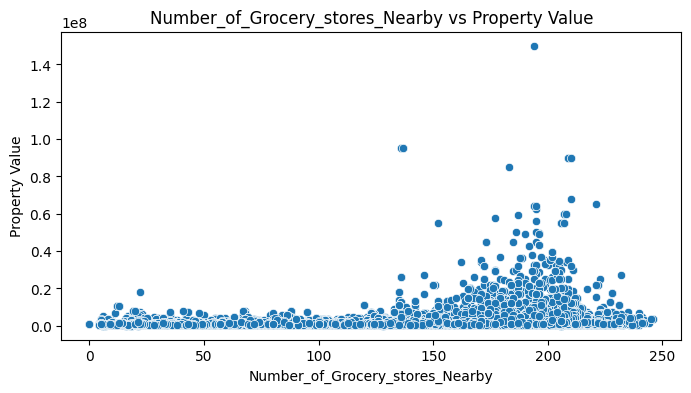

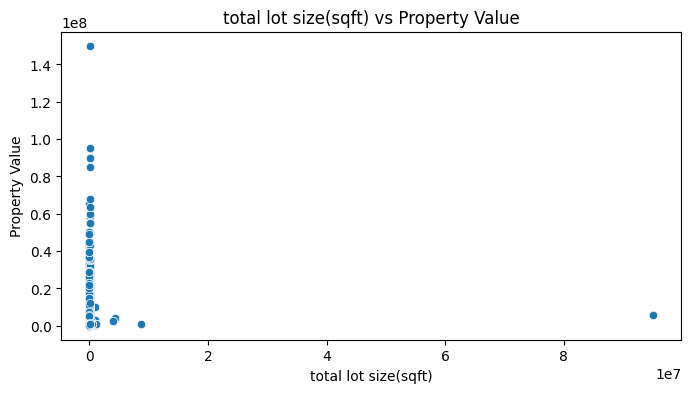

In [22]:

for col in num_cols:
    if col != 'Property Value':
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df[col], y=df['Property Value'])
        plt.title(f'{col} vs Property Value')
        plt.show()

## Analyzing Property Value by Categorical Features
We examine how property values vary across different categories using bar plots. These visualizations help identify which categorical factors (like property type or borough) show significant differences in average home prices. The plots will reveal potential patterns that could be valuable for our predictive model.

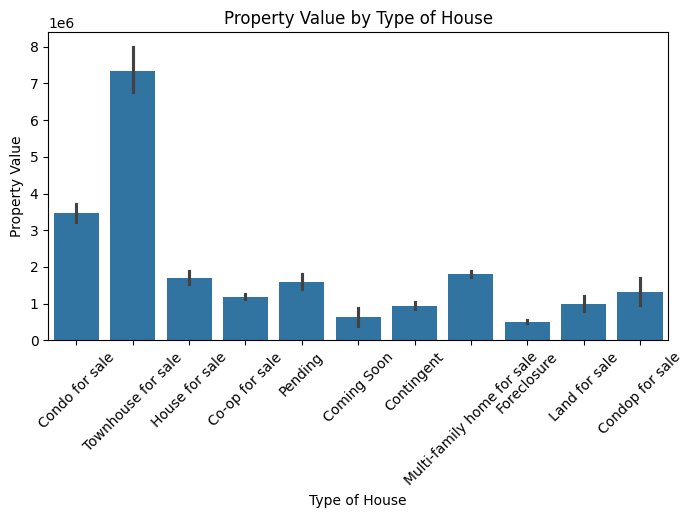

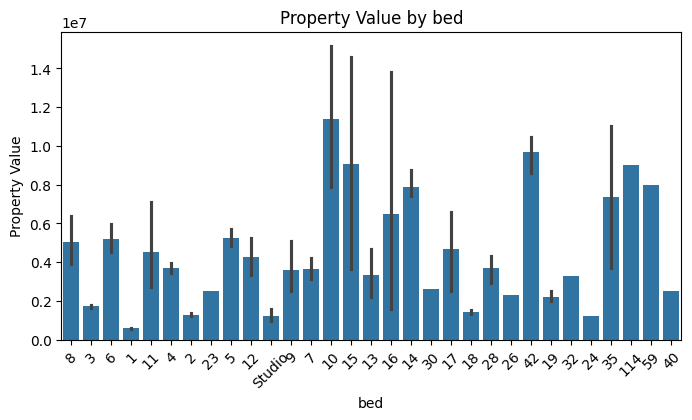

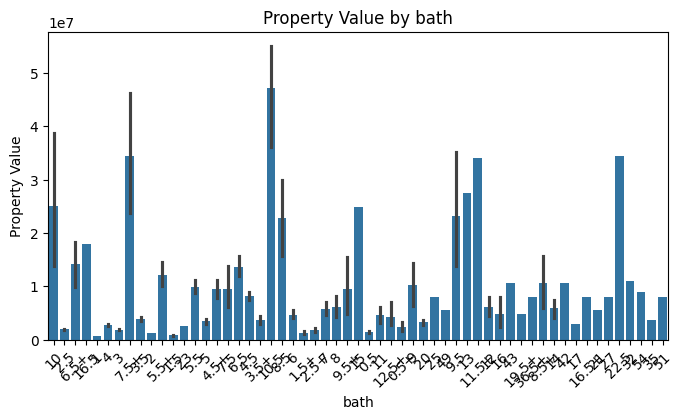

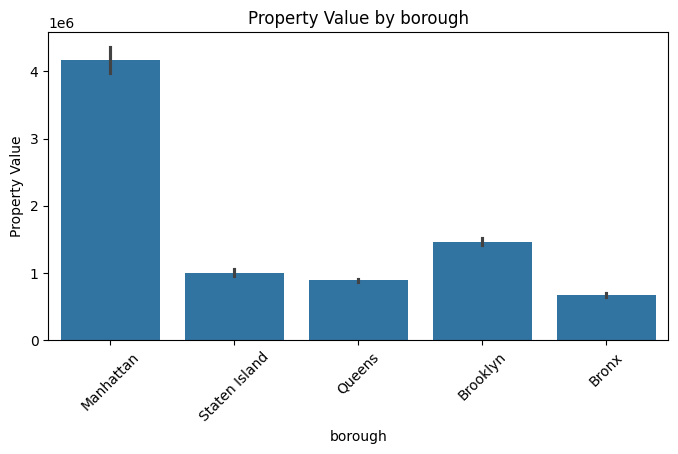

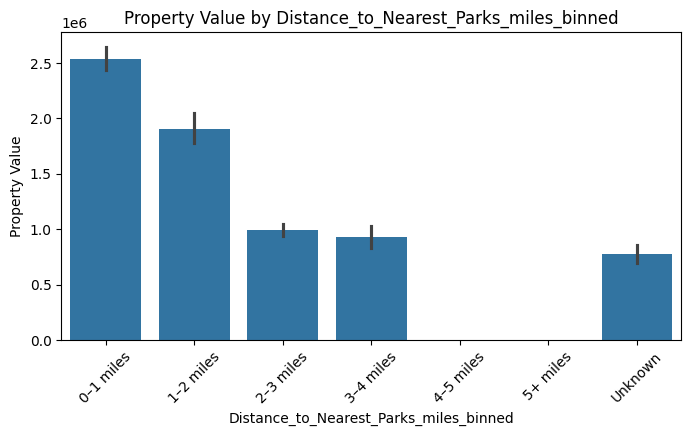

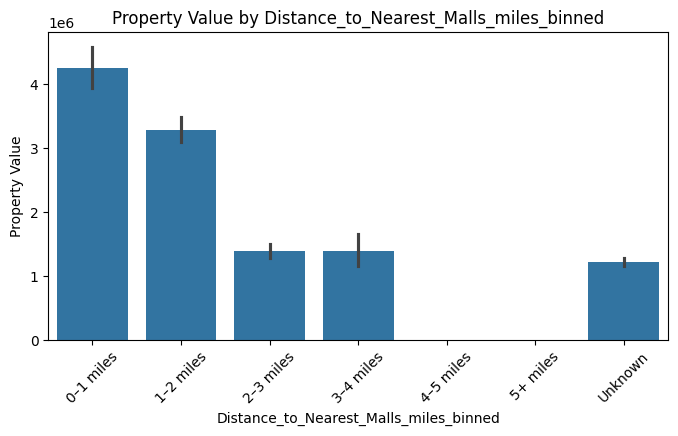

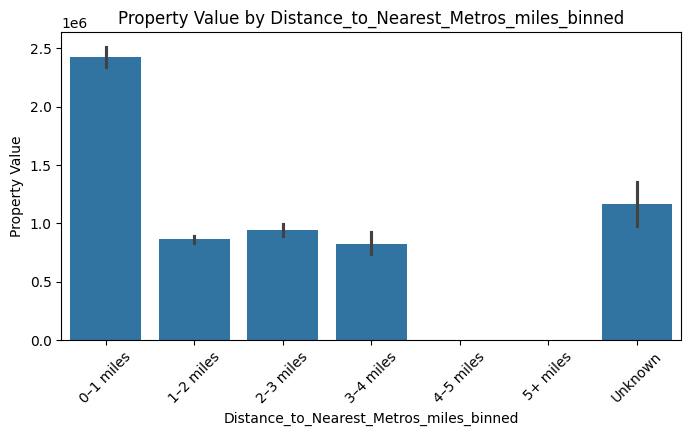

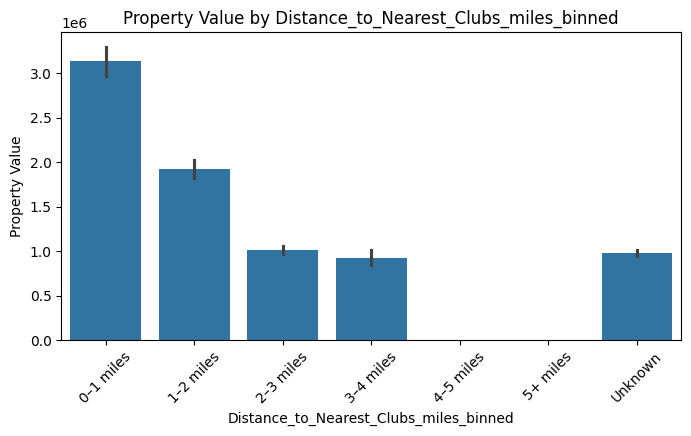

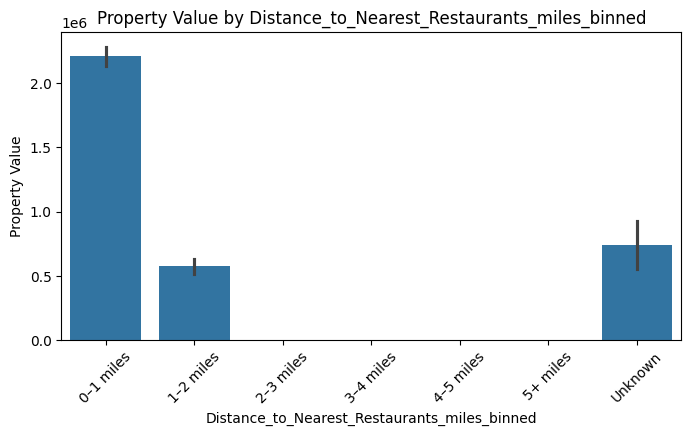

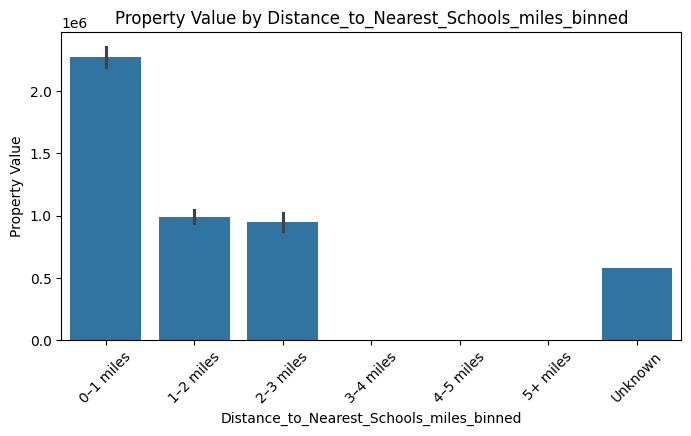

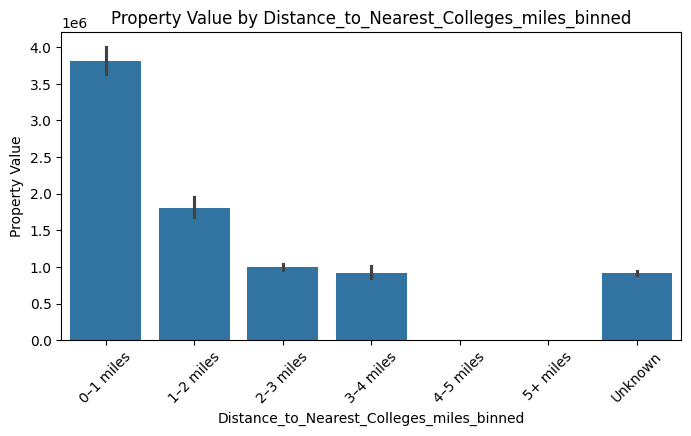

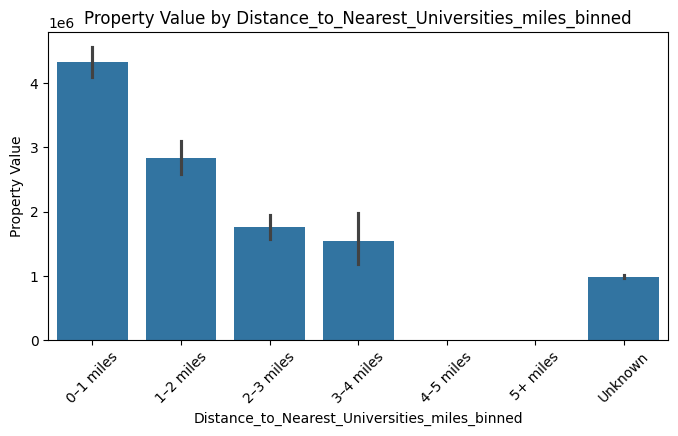

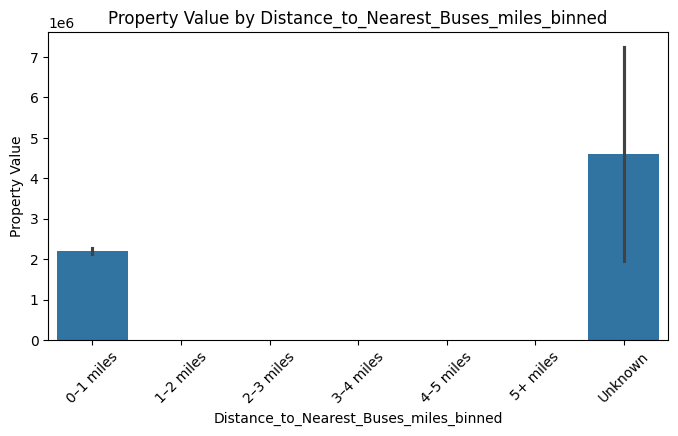

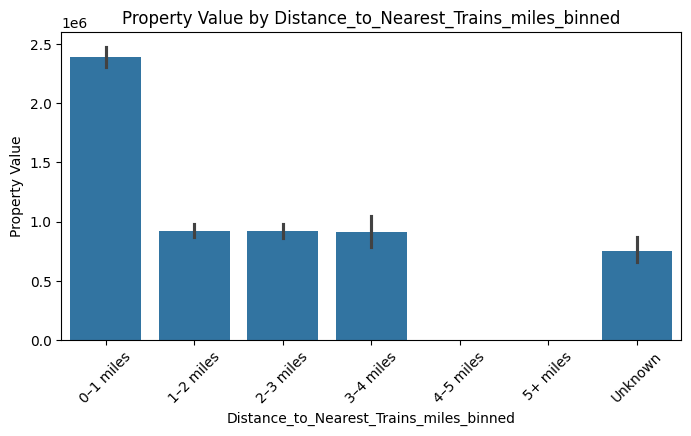

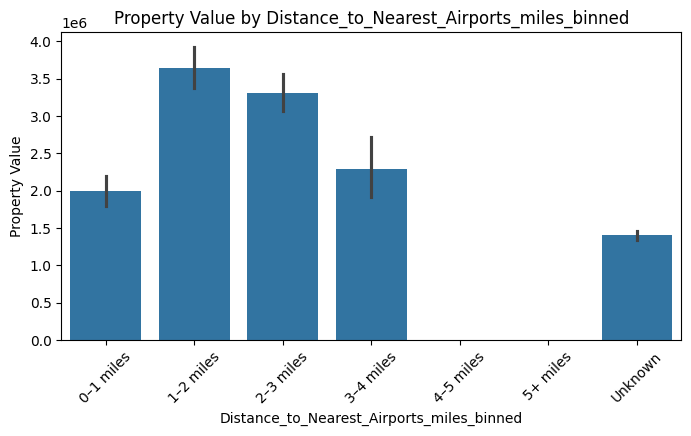

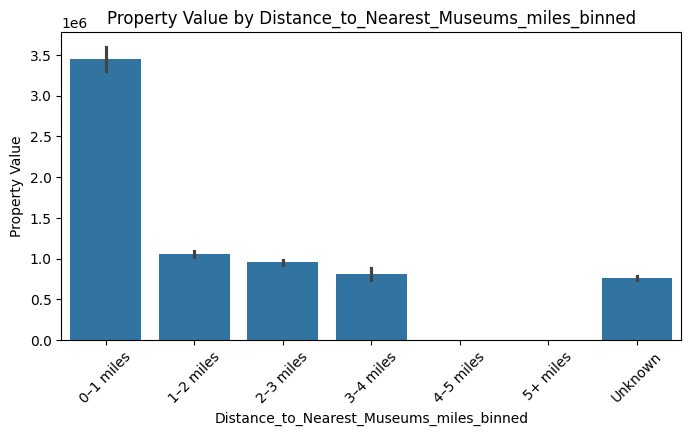

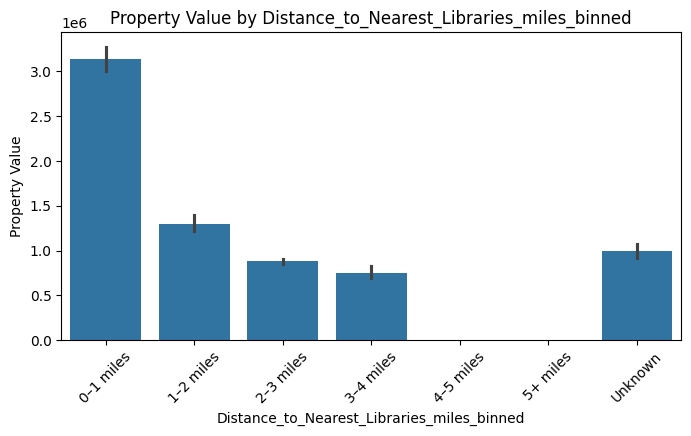

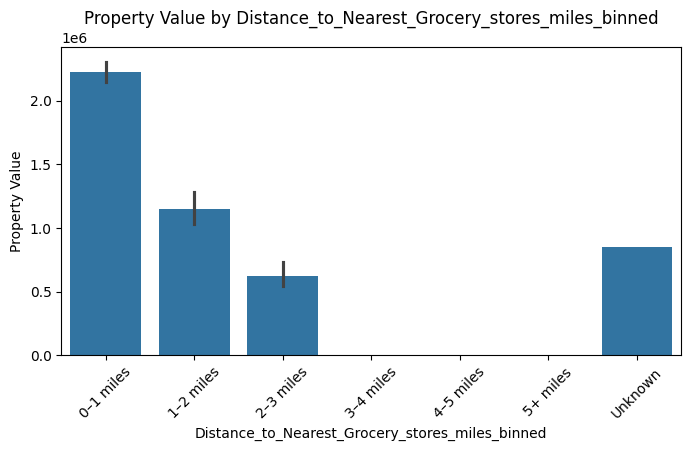

In [23]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df[col], y=df['Property Value'])
    plt.title(f'Property Value by {col}')
    plt.xticks(rotation=45)
    plt.show()


## Geospatial Analysis of Property Values
This scatter plot visualizes property locations using longitude and latitude coordinates, with color and point size representing property values. The visualization helps identify Geographic price clusters (high-value neighborhoods), Location-based price trends, and Potential spatial patterns that could inform location-based features in our model.

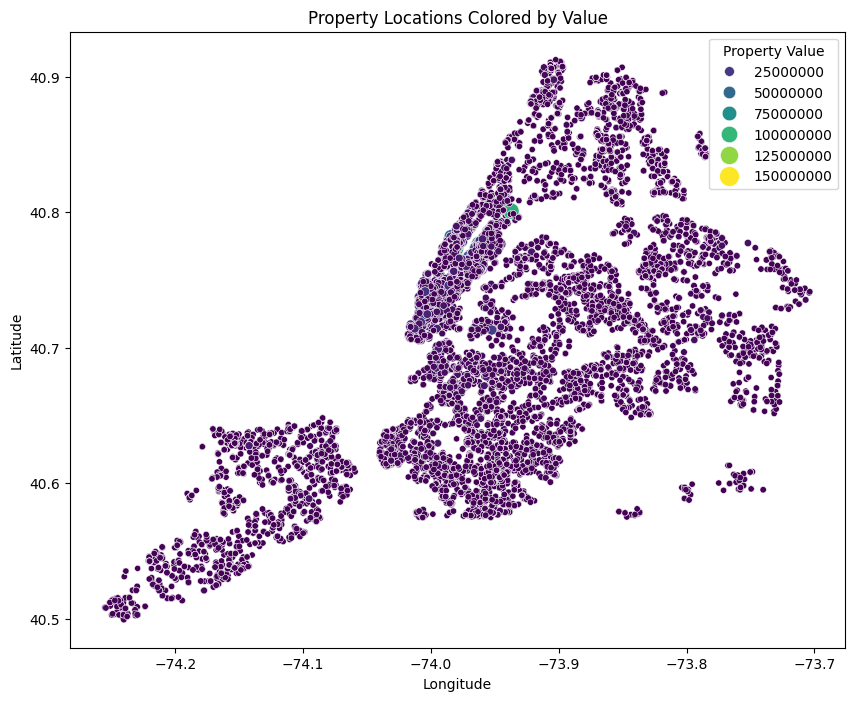

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Property Value', data=df, 
                palette='viridis', size='Property Value', sizes=(20, 200))
plt.title('Property Locations Colored by Value')
plt.show()

## Log Transformation and Visualization of Target Variable
Applied a log transformation to the target variable to reduce its right skewness.

<Axes: >

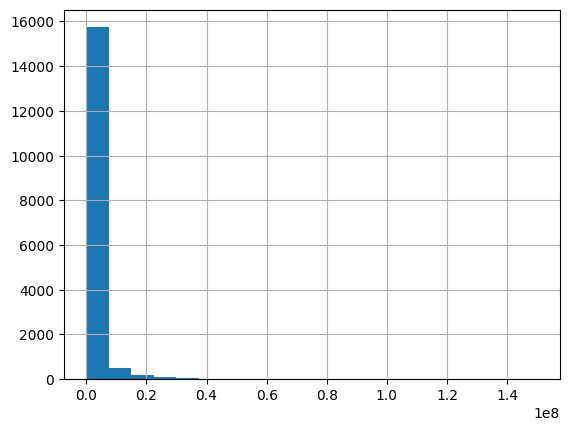

In [25]:
df['Property Value'].hist(bins = 20)

<Axes: >

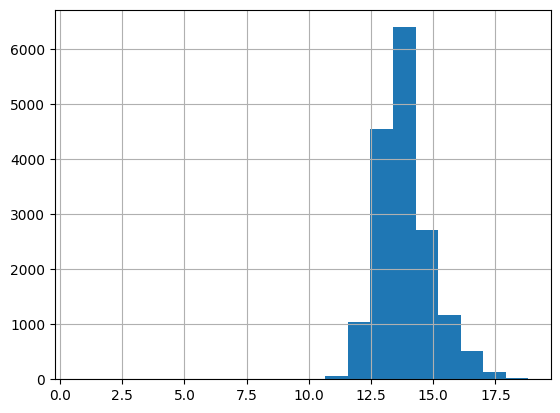

In [26]:
import matplotlib.pyplot as plt
df_encoded['Property Value_log'] = np.log1p(df_encoded['Property Value'])
df_encoded['Property Value_log'].hist(bins = 20)


## Correlation Map
This correlation heatmap focuses only on relationships with coefficients above 0.5, highlighting the strongest positive and negative associations in our dataset. By filtering for these significant correlations, we can identify the redundant features which can be removed, and key predictors that show strong relationships with our target variable (Property Value).

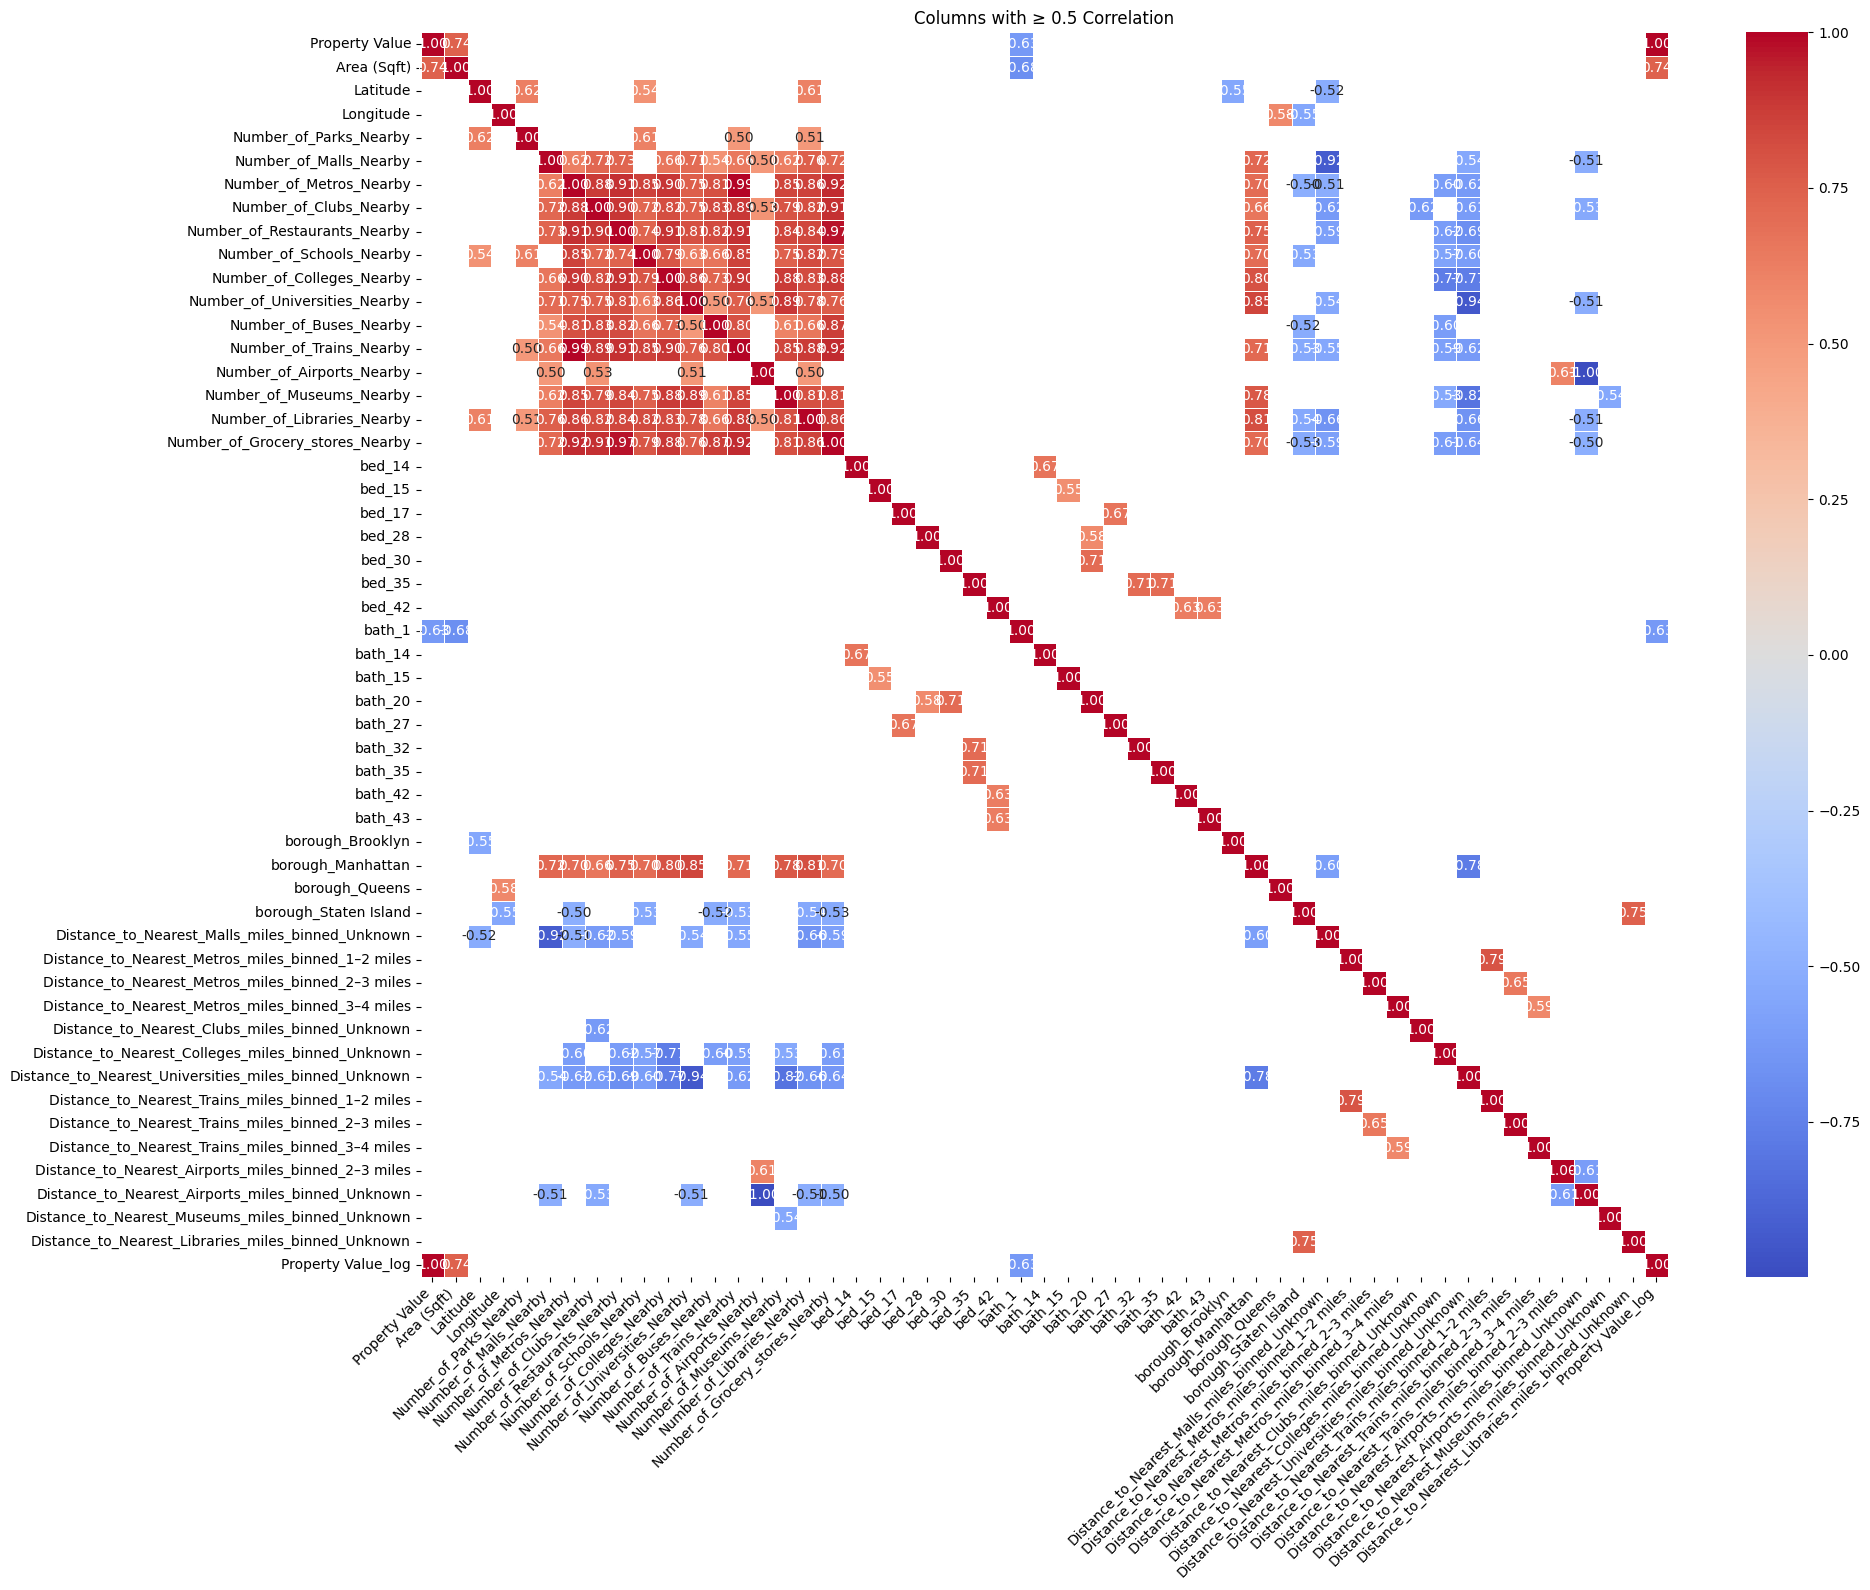

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_encoded.corr(method='spearman')
threshold = 0.5

high_corr_cols = [
    col for col in corr_matrix.columns 
    if ((corr_matrix[col].abs() >= threshold) & (corr_matrix[col] != 1)).any()
]
filtered_corr = corr_matrix.loc[high_corr_cols, high_corr_cols]

plt.figure(figsize=(20, 16))
sns.heatmap(
    filtered_corr,
    annot=True,          
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    mask=(filtered_corr.abs() < threshold)  
)
plt.title(f"Columns with ≥ {threshold} Correlation")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df_final = df_encoded.copy()

In [29]:
df_final.drop(columns=["Property Value"], inplace=True)
df_final

,Area (Sqft),Latitude,Longitude,Number_of_Parks_Nearby,Number_of_Malls_Nearby,Number_of_Metros_Nearby,Number_of_Clubs_Nearby,Number_of_Restaurants_Nearby,Number_of_Schools_Nearby,Number_of_Colleges_Nearby,...,Distance_to_Nearest_Libraries_miles_binned_4–5 miles,Distance_to_Nearest_Libraries_miles_binned_5+ miles,Distance_to_Nearest_Libraries_miles_binned_Unknown,Distance_to_Nearest_Grocery_stores_miles_binned_1–2 miles,Distance_to_Nearest_Grocery_stores_miles_binned_2–3 miles,Distance_to_Nearest_Grocery_stores_miles_binned_3–4 miles,Distance_to_Nearest_Grocery_stores_miles_binned_4–5 miles,Distance_to_Nearest_Grocery_stores_miles_binned_5+ miles,Distance_to_Nearest_Grocery_stores_miles_binned_Unknown,Property Value_log
0,11535.0,40.766474,-73.981266,16,3,110,30,2786,165,12,...,0,0,0,0,0,0,0,0,0,18.826146
1,2431.0,40.826130,-73.943006,37,0,72,5,572,220,4,...,0,0,0,0,0,0,0,0,0,13.383190
2,7200.0,40.787587,-73.969240,19,2,88,7,1933,192,9,...,0,0,0,0,0,0,0,0,0,15.761421
3,33000.0,40.595008,-74.106434,1,0,7,1,173,16,0,...,0,0,0,1,0,0,0,0,0,16.705882
4,1556.0,40.675746,-73.822413,14,1,30,7,252,32,1,...,0,0,0,0,0,0,0,0,0,12.520887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,832.0,40.705254,-74.010340,17,1,106,29,2371,165,9,...,0,0,0,0,0,0,0,0,0,14.070154
16608,1090.0,40.880917,-73.834635,25,0,24,1,83,72,1,...,0,0,0,0,0,0,0,0,0,11.918397
16609,2750.0,40.689108,-73.913931,33,0,83,24,817,150,2,...,0,0,0,0,0,0,0,0,0,13.989465
16610,1053.0,40.722400,-73.856690,12,2,45,13,827,57,1,...,0,0,0,0,0,0,0,0,0,13.120363


## Splitting data set

In [30]:
# Separate target and features
X = df_final.drop(columns=["Property Value_log"])
y = df_final["Property Value_log"]


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Applying standard scalar

In [32]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


## Trying RandomForestRegresoor

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:,.2f}")
print(f" R² Score: {r2:.4f}")


 RMSE: 0.32
 R² Score: 0.9155
